In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0, MobileNetV3Small
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Data preparation

In [2]:
train_path = os.path.join('/kaggle','input','devanagari-handwritten-character-dataset','DevanagariHandwrittenCharacterDataset','Train')
test_path = os.path.join('/kaggle','input','devanagari-handwritten-character-dataset','DevanagariHandwrittenCharacterDataset','Test')
output_path = os.path.join('/kaggle','working')

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    label_mode='categorical',
    batch_size=100,
    image_size=(32, 32),
    shuffle=True
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    label_mode='categorical',
    batch_size=100,
    image_size=(32, 32),
    shuffle=True
)
class_names = [x.split('_')[-1] for x in train_dataset.class_names]
print(f"Class Names: {class_names}") 

Found 78200 files belonging to 46 classes.
Found 13800 files belonging to 46 classes.
Class Names: ['yna', 'taamatar', 'thaa', 'daa', 'dhaa', 'adna', 'tabala', 'tha', 'da', 'dha', 'ka', 'na', 'pa', 'pha', 'ba', 'bha', 'ma', 'yaw', 'ra', 'la', 'waw', 'kha', 'motosaw', 'petchiryakha', 'patalosaw', 'ha', 'chhya', 'tra', 'gya', 'ga', 'gha', 'kna', 'cha', 'chha', 'ja', 'jha', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [4]:
data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.1, 0.1),
    ])
def preprocess_train(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32) 
    image = data_augmentation(image)
    return image, label

In [5]:
def preprocess_test(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # Rescale to [0, 1]
    return image, label

In [6]:
# Step 4: Map the preprocessing functions onto datasets
train_dataset = train_dataset.map(preprocess_train, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(preprocess_test, num_parallel_calls=tf.data.AUTOTUNE)

In [7]:
# Step 5: Optimize with caching and prefetching
train_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Exploratory Data Analysis

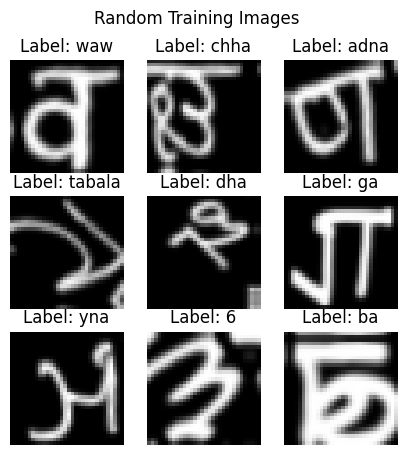

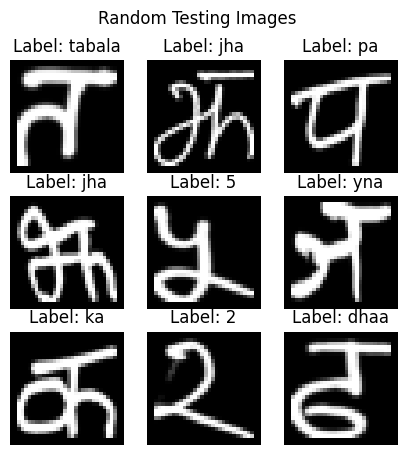

In [8]:
import matplotlib.pyplot as plt

def visualize_images(dataset, title, num_images=9):
    plt.figure(figsize=(5, 5))
    for images, labels in dataset.take(1):
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f"Label: {class_names[tf.argmax(labels[i])]}")
            plt.axis("off")
    plt.suptitle(title)
    plt.show()

visualize_images(train_dataset, "Random Training Images", num_images=9)
visualize_images(test_dataset, "Random Testing Images", num_images=9)


# PCA

Step 1: Converted TensorFlow dataset to NumPy arrays.
Number of batches in train_images: 782
Shape of a batch in train_images: (100, 32, 32, 3)
Step 2: Combined all batches into one NumPy array.
Shape of combined train_images_np: (78200, 32, 32, 3)
Step 3: Flattened each image into a vector.
Shape of flattened train_images_flattened: (78200, 3072)
Step 4.1: Mean-centered the data.
Shape of mean-centered data: (78200, 3072)
Step 4.2: Computed the covariance matrix.
Shape of covariance matrix: (3072, 3072)
Step 4.3: Performed eigen decomposition.
Number of eigenvalues: 3072
Step 4.4: Sorted eigenvalues and eigenvectors.
Step 4.5: Selected top 130 eigenvectors.
Step 5: Conducted PCA on the flattened images.
Original shape: (78200, 3072)
Transformed shape: (78200, 130)


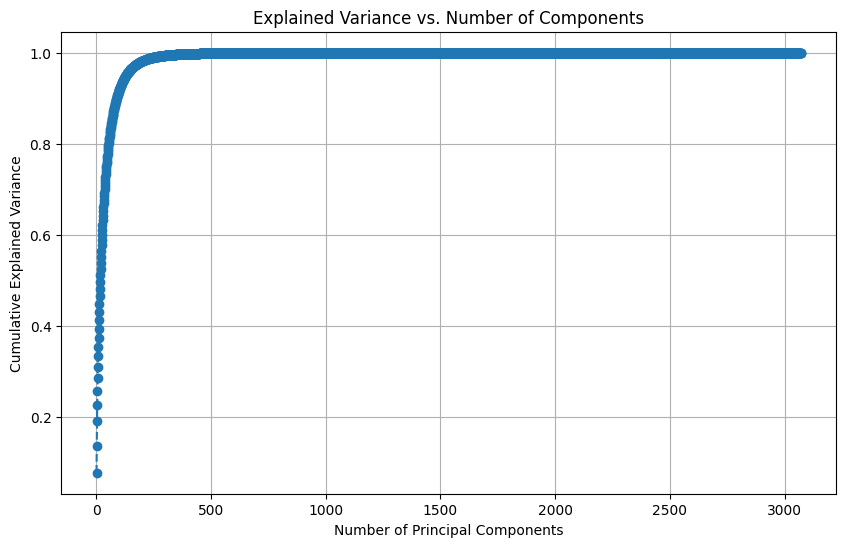

Component 1: Cumulative Explained Variance = 0.0782
Component 2: Cumulative Explained Variance = 0.1358
Component 3: Cumulative Explained Variance = 0.1918
Component 4: Cumulative Explained Variance = 0.2269
Component 5: Cumulative Explained Variance = 0.2571
Component 6: Cumulative Explained Variance = 0.2856
Component 7: Cumulative Explained Variance = 0.3101
Component 8: Cumulative Explained Variance = 0.3342
Component 9: Cumulative Explained Variance = 0.3546
Component 10: Cumulative Explained Variance = 0.3746
Component 11: Cumulative Explained Variance = 0.3942
Component 12: Cumulative Explained Variance = 0.4135
Component 13: Cumulative Explained Variance = 0.4319
Component 14: Cumulative Explained Variance = 0.4490
Component 15: Cumulative Explained Variance = 0.4658
Component 16: Cumulative Explained Variance = 0.4817
Component 17: Cumulative Explained Variance = 0.4975
Component 18: Cumulative Explained Variance = 0.5120
Component 19: Cumulative Explained Variance = 0.5262
Co

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

class PCAImplementation:
    def __init__(self, n_components=0.95):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.eigenvalues = None

    def fit(self, data):
        # Step 1: Mean Centering
        self.mean = np.mean(data, axis=0)
        data_centered = data - self.mean
        print("Step 4.1: Mean-centered the data.")
        print("Shape of mean-centered data:", data_centered.shape)

        # Step 2: Calculate Covariance Matrix
        covariance_matrix = np.cov(data_centered, rowvar=False)
        print("Step 4.2: Computed the covariance matrix.")
        print("Shape of covariance matrix:", covariance_matrix.shape)

        # Step 3: Eigen Decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        print("Step 4.3: Performed eigen decomposition.")
        print("Number of eigenvalues:", len(eigenvalues))
        self.eigenvalues = eigenvalues

        # Step 4: Sort Eigenvalues and Eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        print("Step 4.4: Sorted eigenvalues and eigenvectors.")

        # Step 5: Select Top k Eigenvectors
        total_variance = np.sum(eigenvalues)
        variance_sum = 0
        num_components = 0
        for i in range(len(eigenvalues)):
            variance_sum += eigenvalues[i]
            num_components += 1
            if variance_sum / total_variance >= self.n_components:
                break
        self.components = eigenvectors[:, :num_components]
        print(f"Step 4.5: Selected top {num_components} eigenvectors.")

    def transform(self, data):
        if self.mean is None or self.components is None:
            raise ValueError("PCA not fitted yet. Call fit() first.")
        data_centered = data - self.mean
        transformed_data = np.dot(data_centered, self.components)
        return transformed_data

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

# Convert TensorFlow Dataset to NumPy arrays for PCA
train_images, train_labels = [], []
for images, labels in train_dataset:
    train_images.append(images.numpy())
    train_labels.append(labels.numpy())

print("Step 1: Converted TensorFlow dataset to NumPy arrays.")
print("Number of batches in train_images:", len(train_images))
print("Shape of a batch in train_images:", train_images[0].shape)

# Flatten the images and prepare them for PCA
train_images_np = np.concatenate(train_images, axis=0)  # Combine all batches
print("Step 2: Combined all batches into one NumPy array.")
print("Shape of combined train_images_np:", train_images_np.shape)

train_images_flattened = train_images_np.reshape(train_images_np.shape[0], -1)  # Flatten each image into a vector
print("Step 3: Flattened each image into a vector.")
print("Shape of flattened train_images_flattened:", train_images_flattened.shape)

# Conduct PCA using the custom step-by-step implementation
pca_impl = PCAImplementation(n_components=0.95)
train_images_pca = pca_impl.fit_transform(train_images_flattened)
print("Step 5: Conducted PCA on the flattened images.")
print("Original shape:", train_images_flattened.shape)
print("Transformed shape:", train_images_pca.shape)

# Plot Explained Variance
def plot_explained_variance(eigenvalues):
    total_variance = np.sum(eigenvalues)
    explained_variance_ratio = [(i / total_variance) for i in sorted(eigenvalues, reverse=True)]
    cumulative_variance = np.cumsum(explained_variance_ratio)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Components')
    plt.grid()
    plt.show()

    for i, variance in enumerate(cumulative_variance):
        print(f"Component {i+1}: Cumulative Explained Variance = {variance:.4f}")

# Plotting Explained Variance
plot_explained_variance(pca_impl.eigenvalues)

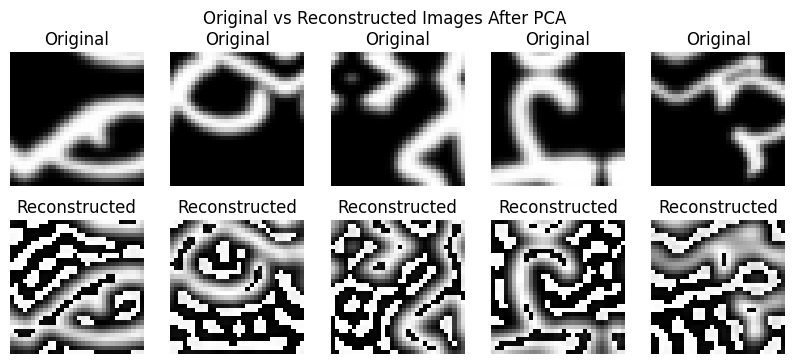

In [11]:
# Reshape reduced data back to image dimensions for visualization (if possible)
num_samples_to_plot = 5
reconstructed_images = np.dot(train_images_pca[:num_samples_to_plot], pca_impl.components.T) + pca_impl.mean
reconstructed_images = reconstructed_images.reshape((num_samples_to_plot, 32, 32, 3))

# Plot original vs reconstructed images
plt.figure(figsize=(10, 4))
for i in range(num_samples_to_plot):
    # Original Image
    plt.subplot(2, num_samples_to_plot, i + 1)
    plt.imshow(train_images_np[i].astype('uint8'))
    plt.title("Original")
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(2, num_samples_to_plot, num_samples_to_plot + i + 1)
    plt.imshow(reconstructed_images[i].astype('uint8'))
    plt.title("Reconstructed")
    plt.axis('off')

plt.suptitle("Original vs Reconstructed Images After PCA")
plt.show()

## Deep Learning Models

### CNN

In [9]:
input_shape = (32, 32, 3)
num_classes = len(class_names)

In [10]:
def vanilla_cnn(input_shape, num_classes):
    model = tf.keras.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.BatchNormalization(),
        # layers.Dropout(0.3),
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),

        layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

        # Output Layer
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy','f1_score'])
    return model


In [11]:
# Vanilla CNN
vanilla_cnn_model = vanilla_cnn(input_shape, num_classes)
history_cnn = vanilla_cnn_model.fit(train_dataset, validation_data=test_dataset, epochs=30)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733210286.077822      67 service.cc:145] XLA service 0x7a87600070f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733210286.077895      67 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  9/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.0220 - f1_score: 0.0196 - loss: 6.3769

I0000 00:00:1733210290.829127      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 138ms/step - accuracy: 0.2340 - f1_score: 0.2281 - loss: 4.2730 - val_accuracy: 0.8114 - val_f1_score: 0.8082 - val_loss: 1.1015
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6133 - f1_score: 0.6108 - loss: 1.6996 - val_accuracy: 0.8347 - val_f1_score: 0.8353 - val_loss: 0.9060
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7020 - f1_score: 0.7006 - loss: 1.3493 - val_accuracy: 0.8587 - val_f1_score: 0.8588 - val_loss: 0.8271
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7421 - f1_score: 0.7410 - loss: 1.2057 - val_accuracy: 0.8722 - val_f1_score: 0.8726 - val_loss: 0.7770
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7646 - f1_score: 0.7640 - loss: 1.1180 - val_accuracy: 0.8520 - val_f1_score: 0.8537 - val_loss: 0.8431
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7787 - f1_score: 0.7781 - loss: 1.0530 - val_accuracy: 0.8621 - val_f1_score: 0.8627 - val_

In [12]:
train_loss, train_accuracy, _ = vanilla_cnn_model.evaluate(train_dataset)
validate_loss, validate_accuracy, _ = vanilla_cnn_model.evaluate(test_dataset)
print("Train: accuracy = %f  ;  loss_v = %f" % (train_accuracy, train_loss))
print("Validation: accuracy = %f  ;  loss_v = %f" % (validate_accuracy, validate_loss))

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8954 - f1_score: 0.8955 - loss: 0.6031
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8709 - f1_score: 0.8688 - loss: 0.7885
Train: accuracy = 0.901368  ;  loss_v = 0.584086
Validation: accuracy = 0.874710  ;  loss_v = 0.770100


In [13]:
def efficientnet_model(input_shape, num_classes):
    base_model = tf.keras.applications.EfficientNetB0(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    # base_model.trainable = False  # Freeze base model layers initially

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),#'adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', 'f1_score'])
    return model

In [14]:
# EfficientNet
efficientnet = efficientnet_model(input_shape, num_classes)
history_efficient = efficientnet.fit(train_dataset, validation_data=test_dataset, epochs=20)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 37ms/step - accuracy: 0.3631 - f1_score: 0.3604 - loss: 2.4729 - val_accuracy: 0.8796 - val_f1_score: 0.8789 - val_loss: 0.4085
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8260 - f1_score: 0.8260 - loss: 0.6246 - val_accuracy: 0.8738 - val_f1_score: 0.8751 - val_loss: 0.4550
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8903 - f1_score: 0.8902 - loss: 0.3869 - val_accuracy: 0.9087 - val_f1_score: 0.9101 - val_loss: 0.3412
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9159 - f1_score: 0.9158 - loss: 0.2967 - val_accuracy: 0.9346 - val_f1_score: 0.9348 - val_loss: 0.2895
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.9308 - f1_score: 0.9308 - loss: 0.2416 - val_accuracy: 0.9326 - val_f1_score: 0.9328 - val_loss: 0.2405
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9416 - f1_score: 0.9

In [15]:
train_loss, train_accuracy, _ = efficientnet.evaluate(train_dataset)
validate_loss, validate_accuracy, _ = efficientnet.evaluate(test_dataset)
print("Train: accuracy = %f  ;  loss_v = %f" % (train_accuracy, train_loss))
print("Validation: accuracy = %f  ;  loss_v = %f" % (validate_accuracy, validate_loss))

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9848 - f1_score: 0.9847 - loss: 0.0536
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9666 - f1_score: 0.9656 - loss: 0.1541
Train: accuracy = 0.986560  ;  loss_v = 0.046235
Validation: accuracy = 0.967246  ;  loss_v = 0.143507


In [16]:
def mobilenet_model(input_shape, num_classes):
    base_model = tf.keras.applications.MobileNetV3Small(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    # base_model.trainable = False  # Freeze base model layers initially

    model = tf.keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),#'adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy','f1_score'])
    return model

In [17]:
# MobileNet
mobilenet = mobilenet_model(input_shape, num_classes)
history_mobilenet = mobilenet.fit(train_dataset, validation_data=test_dataset, epochs=20)

/opt/conda/lib/python3.10/site-packages/keras/src/applications/mobilenet_v3.py:449: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 19ms/step - accuracy: 0.1133 - f1_score: 0.1068 - loss: 3.6229 - val_accuracy: 0.1551 - val_f1_score: 0.1193 - val_loss: 4.2023
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5123 - f1_score: 0.5077 - loss: 1.7095 - val_accuracy: 0.3273 - val_f1_score: 0.2774 - val_loss: 3.0076
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6847 - f1_score: 0.6832 - loss: 1.0879 - val_accuracy: 0.4573 - val_f1_score: 0.4338 - val_loss: 2.5429
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7654 - f1_score: 0.7648 - loss: 0.8046 - val_accuracy: 0.6318 - val_f1_score: 0.6226 - val_loss: 1.5878
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8145 - f1_score: 0.8141 - loss: 0.6389 - val_accuracy: 0.7057 - val_f1_score: 0.7008 - val_loss: 1.2031
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8447 - f1_score: 0.8446

In [18]:
train_loss, train_accuracy, _ = mobilenet.evaluate(train_dataset)
validate_loss, validate_accuracy, _ = mobilenet.evaluate(test_dataset)
print("Train: accuracy = %f  ;  loss_v = %f" % (train_accuracy, train_loss))
print("Validation: accuracy = %f  ;  loss_v = %f" % (validate_accuracy, validate_loss))

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9064 - f1_score: 0.9064 - loss: 0.3822
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8768 - f1_score: 0.8746 - loss: 0.6365
Train: accuracy = 0.910921  ;  loss_v = 0.360952
Validation: accuracy = 0.876014  ;  loss_v = 0.653223


### Deep Belief Networks

In [19]:
def extract_data(dataset):
    images, labels = [], []
    for img_batch, label_batch in dataset:
        images.extend(img_batch.numpy().reshape(len(img_batch), -1))  # Flatten images
        labels.extend(tf.argmax(label_batch, axis=1).numpy())  # Decode one-hot labels
    return np.array(images) / 255.0, np.array(labels)

# Extract data from train_dataset and test_dataset
train_images, train_labels = extract_data(train_dataset)
test_images, test_labels = extract_data(test_dataset)

# One-hot encode labels for DBN fine-tuning
num_classes = len(class_names)
train_labels_onehot = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels_onehot = tf.keras.utils.to_categorical(test_labels, num_classes)

In [20]:
class RBM(tf.keras.layers.Layer):
    def __init__(self, visible_units, hidden_units, learning_rate=0.01):
        super(RBM, self).__init__()
        self.visible_units = visible_units
        self.hidden_units = hidden_units
        self.learning_rate = learning_rate
        self.built = False

    def build(self, input_shape):
        # Initialize weights and biases with unique names
        self.rbm_weights = self.add_weight(
            shape=(self.visible_units, self.hidden_units),
            initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.1),
            trainable=True,
            name="rbm_weights"
        )
        self.hidden_bias = self.add_weight(
            shape=(self.hidden_units,),
            initializer="zeros",
            trainable=True,
            name="hidden_bias"
        )
        self.visible_bias = self.add_weight(
            shape=(self.visible_units,),
            initializer="zeros",
            trainable=True,
            name="visible_bias"
        )
        self.built = True

    def forward(self, visible):
        # Ensure weights are initialized
        if not self.built:
            self.build((None, visible.shape[1]))
        hidden_prob = tf.nn.sigmoid(tf.matmul(visible, self.rbm_weights) + self.hidden_bias)
        hidden_states = tf.cast(hidden_prob > tf.random.uniform(tf.shape(hidden_prob)), tf.float32)
        return hidden_prob, hidden_states

    def backward(self, hidden):
        visible_prob = tf.nn.sigmoid(tf.matmul(hidden, tf.transpose(self.rbm_weights)) + self.visible_bias)
        return visible_prob

    def train(self, inputs):
        # Forward pass
        hidden_prob, hidden_states = self.forward(inputs)

        # Backward pass
        reconstructed_visible_prob = self.backward(hidden_states)
        reconstructed_hidden_prob, _ = self.forward(reconstructed_visible_prob)

        # Compute gradients
        positive_grad = tf.matmul(tf.transpose(inputs), hidden_prob)
        negative_grad = tf.matmul(tf.transpose(reconstructed_visible_prob), reconstructed_hidden_prob)

        # Update weights and biases
        self.rbm_weights.assign_add(self.learning_rate * (positive_grad - negative_grad) / tf.cast(tf.shape(inputs)[0], tf.float32))
        self.visible_bias.assign_add(self.learning_rate * tf.reduce_mean(inputs - reconstructed_visible_prob, axis=0))
        self.hidden_bias.assign_add(self.learning_rate * tf.reduce_mean(hidden_prob - reconstructed_hidden_prob, axis=0))

In [21]:
class DBN:
    def __init__(self, layer_sizes, learning_rate=0.01):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.rbms = [RBM(layer_sizes[i], layer_sizes[i + 1], learning_rate) for i in range(len(layer_sizes) - 1)]

    def pretrain(self, data, epochs=10):
        input_data = data
        for i, rbm in enumerate(self.rbms):
            print(f"Training RBM {i + 1}/{len(self.rbms)}")
            for epoch in range(epochs):
                rbm.train(input_data)
            input_data, _ = rbm.forward(input_data)

    def fine_tune(self, data, labels, epochs=10, dropout_rate = 0.3):
        model = tf.keras.Sequential()
        input_size = self.layer_sizes[0]  # Start with the input size of the data

        i = 0
        # Add layers corresponding to pretrained RBMs
        for rbm in self.rbms:
            # Add Dense layer without initializing weights
            dense_layer = tf.keras.layers.Dense(
                rbm.hidden_units,
                activation="sigmoid",
                trainable=True
            )
            model.add(dense_layer)
    
            # Force the layer to build by providing the correct input shape
            dense_layer.build(input_shape=(None, input_size))
    
            # Set the pretrained weights and biases
            dense_layer.set_weights([rbm.rbm_weights.numpy(), rbm.hidden_bias.numpy()])

            # adding drop layer
            if i%2==0:
                model.add(tf.keras.layers.Dropout(rate=dropout_rate))
                i+=1

            model.add(layers.BatchNormalization())
            
            # Update input size for the next layer
            input_size = rbm.hidden_units
    
        # Add final classification layer
        model.add(
            tf.keras.layers.Dense(
                labels.shape[1],
                activation="softmax"
            )
        )
    
        # Compile the model
        model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "f1_score"])
    
        # Train the model
        history = model.fit(data, labels, epochs=epochs, validation_split=0.15)
        return model, history
    def predict(self, data):
        # Forward pass through all the RBMs (unsupervised feature extraction)
        input_data = data
        for rbm in self.rbms:
            # Compute the hidden probabilities and use them as input to the next RBM
            hidden_prob, _ = rbm.forward(input_data)
            input_data = hidden_prob
    
        # Forward pass through the fine-tuned model (supervised prediction)
        predictions = self.fine_tuned_model.predict(input_data)
        predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class labels
    
        return predicted_labels

In [22]:
# Define DBN architecture
input_dim = train_images.shape[1]  # Number of flattened input features
layer_sizes = [input_dim, 2048, 1024, 512]  # Input layer and two hidden layers

# Initialize the DBN
dbn = DBN(layer_sizes, learning_rate=0.01)

# Pretrain the DBN
dbn.pretrain(train_images, epochs=10)

# Fine-tune the DBN for classification
model, history_dbn = dbn.fine_tune(train_images, train_labels_onehot, epochs=40)

# Evaluate the DBN
test_loss, test_accuracy, results = model.evaluate(test_images, test_labels_onehot)
print(f"Test Accuracy: {test_accuracy:.2f}")

Training RBM 1/3
Training RBM 2/3
Training RBM 3/3
Epoch 1/40
2078/2078 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.1608 - f1_score: 0.1498 - loss: 3.3723 - val_accuracy: 0.3484 - val_f1_score: 0.3319 - val_loss: 2.3831
Epoch 2/40
2078/2078 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3331 - f1_score: 0.3198 - loss: 2.4267 - val_accuracy: 0.4230 - val_f1_score: 0.4109 - val_loss: 2.0624
Epoch 3/40
2078/2078 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3990 - f1_score: 0.3897 - loss: 2.1487 - val_accuracy: 0.4702 - val_f1_score: 0.4592 - val_loss: 1.8868
Epoch 4/40
2078/2078 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4419 - f1_score: 0.4332 - loss: 1.9784 - val_accuracy: 0.5003 - val_f1_score: 0.4900 - val_loss: 1.7888
Epoch 5/40
2078/2078 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4683 - f1_score: 0.4596 - loss: 1.8689 - val_accuracy: 0.5106 - val_f1_score: 0.5005 - val_loss: 1.7273
Epoch 6/40
2078/2078 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4936 - f1_score: 0.4

In [26]:
train_loss, train_accuracy, results = model.evaluate(train_images, train_labels_onehot)

2444/2444 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8380 - f1_score: 0.8364 - loss: 0.5381


## Plots

### Plotting history

In [23]:
def plot_model_history(hist, model_name):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'
    
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title(f'Training and Validation Loss: {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title(f'Training and Validation Accuracy: {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout
    plt.show()

In [24]:
def plot_confusion_matrix(model, test_dataset, class_names):
    """
    Plots a formatted confusion matrix for better readability.
    :param model: Trained model to evaluate.
    :param test_dataset: Dataset to test the model on.
    :param class_names: List of class labels.
    """
    # Get true labels and predictions
    y_true = []
    y_pred = []

    for images, labels in test_dataset:
        # True labels
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        # Predicted labels
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix with formatting
    fig, ax = plt.subplots(figsize=(12, 12))  # Adjust the figure size for readability
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(
        include_values=True,  # Show values inside the matrix
        cmap=plt.cm.Blues,    # Use a color map
        xticks_rotation=45,   # Rotate x-axis labels
        ax=ax                 # Use the custom-sized figure
    )
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()


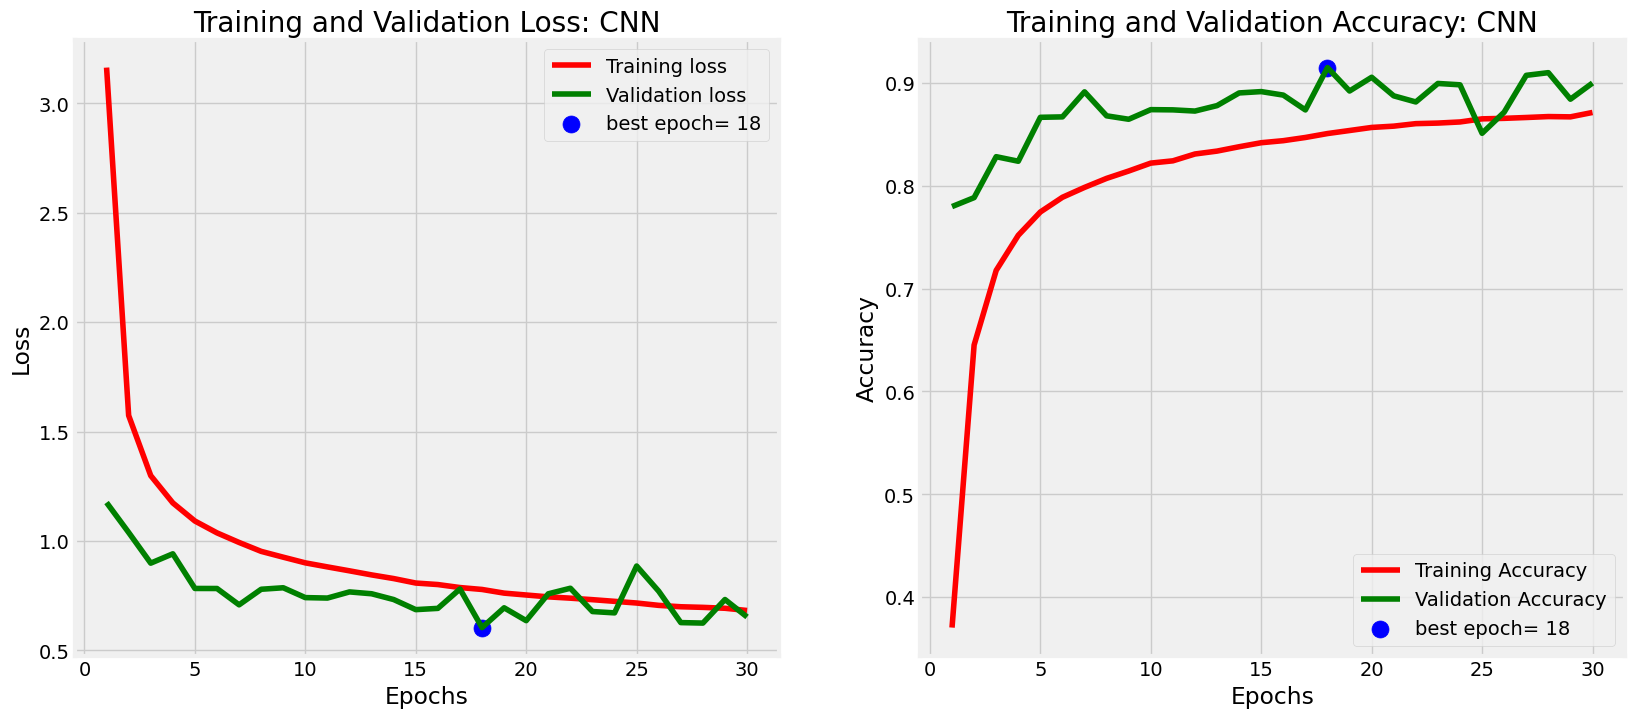

In [41]:
plot_model_history(history_cnn,'CNN')

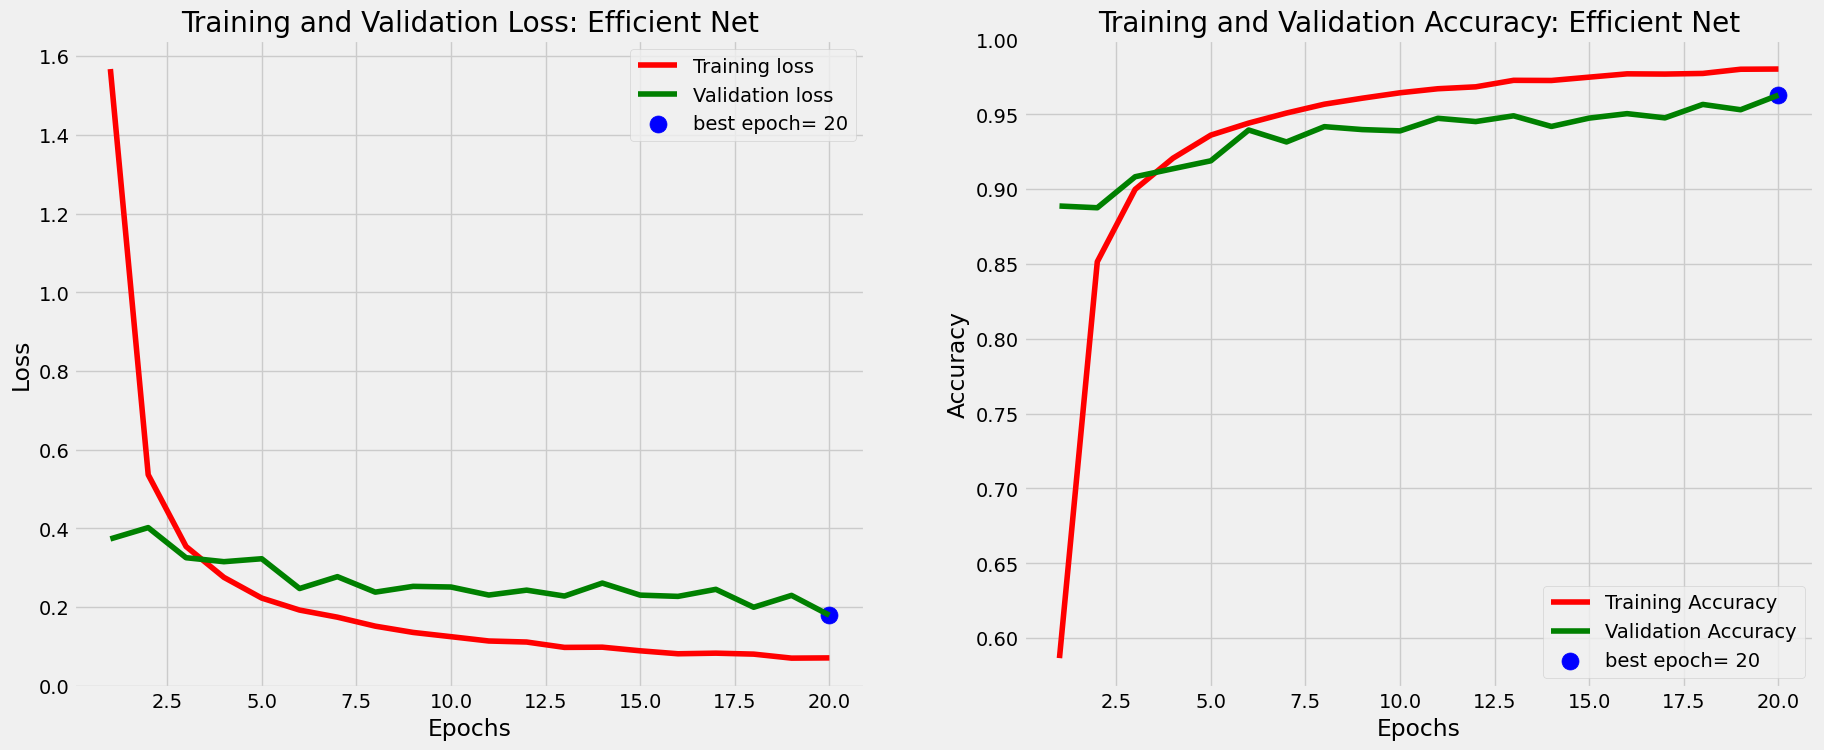

In [42]:
plot_model_history(history_efficient,'Efficient Net')

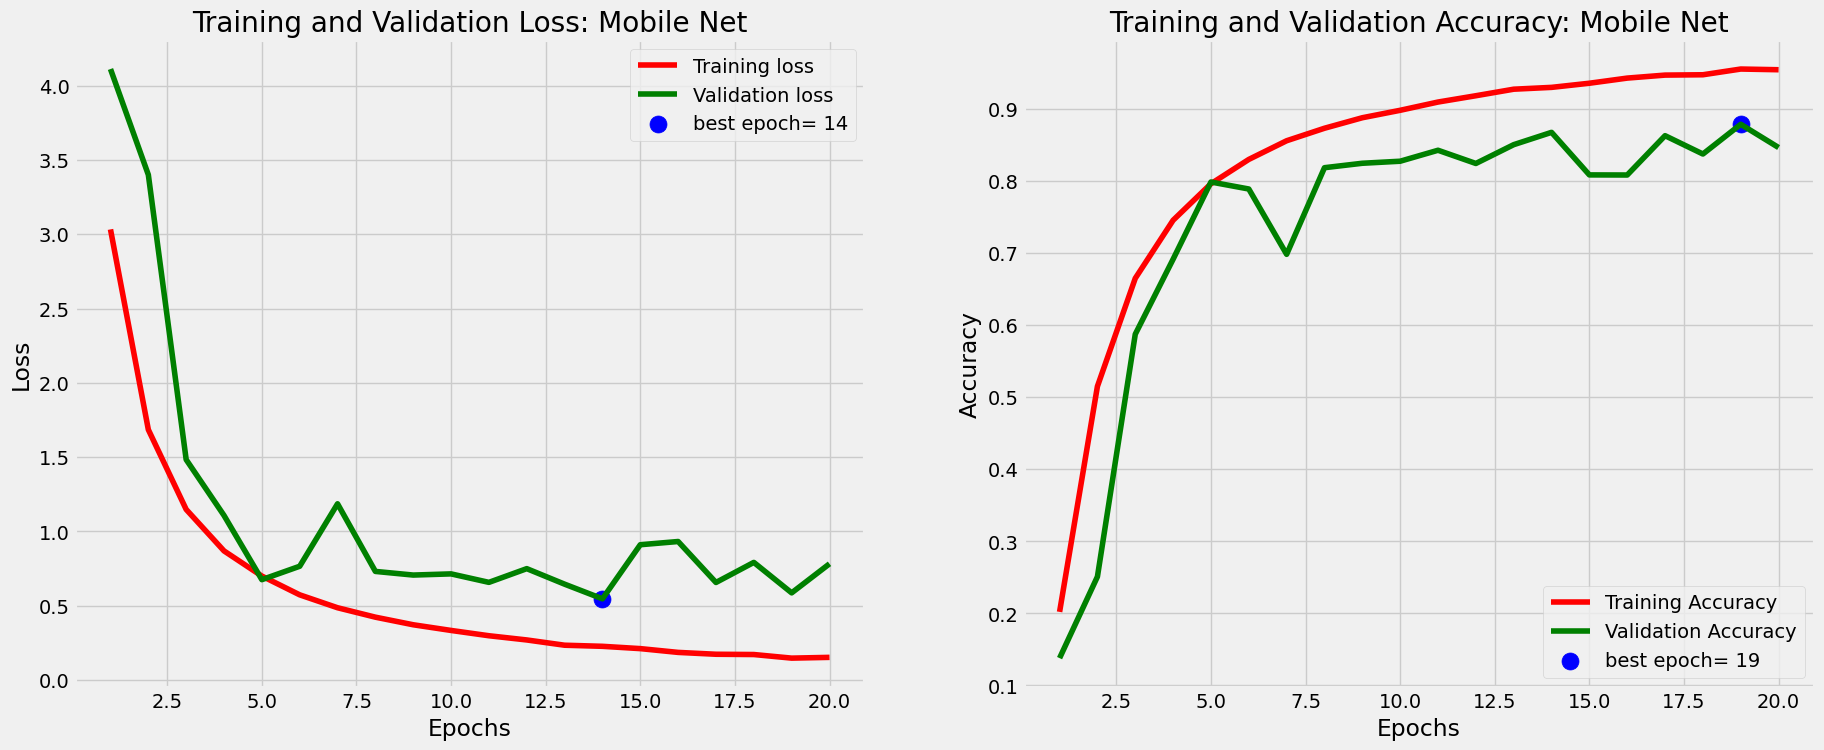

In [43]:
plot_model_history(history_mobilenet,'Mobile Net')

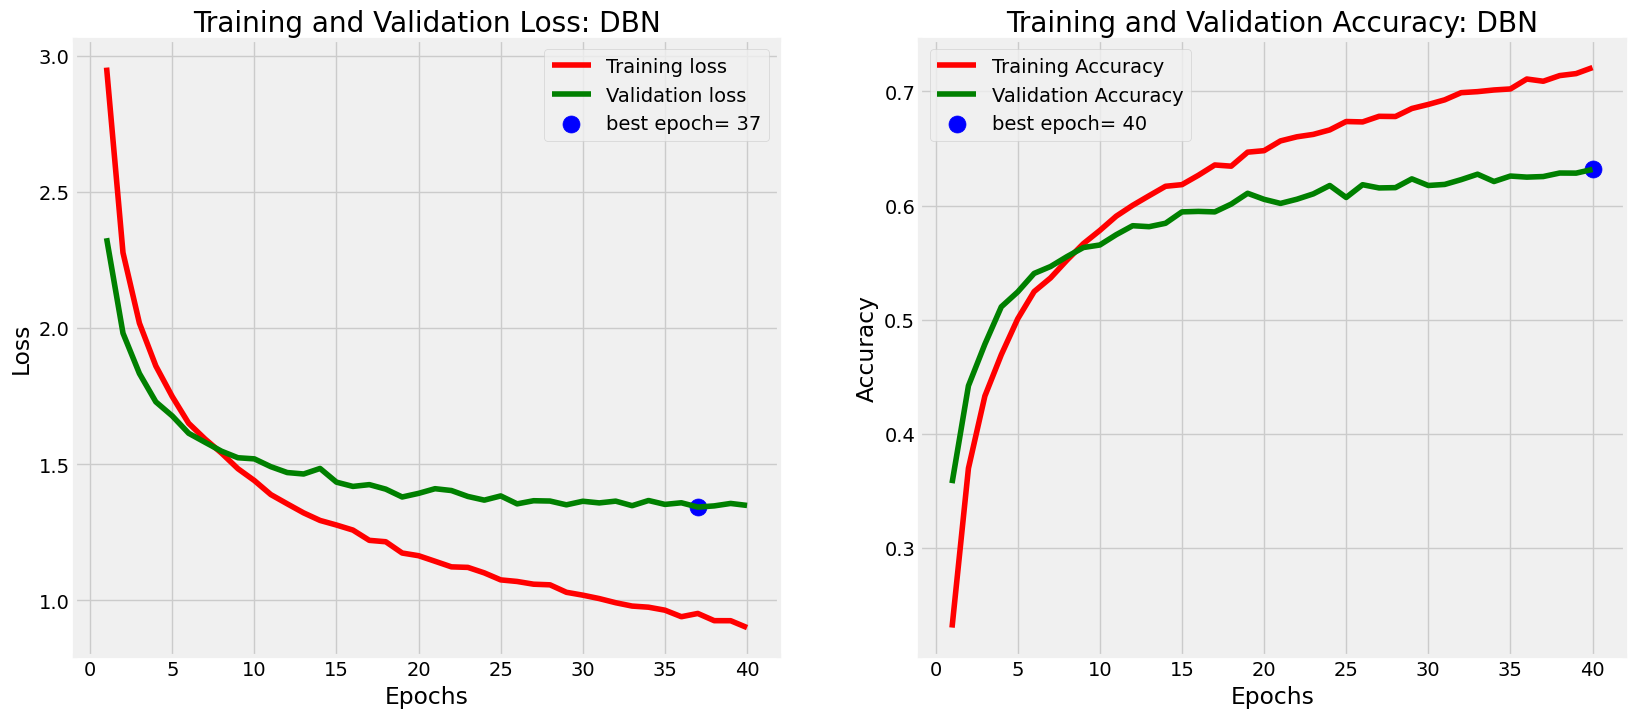

In [64]:
plot_model_history(history_dbn,'DBN')

Confusion Matrix

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━

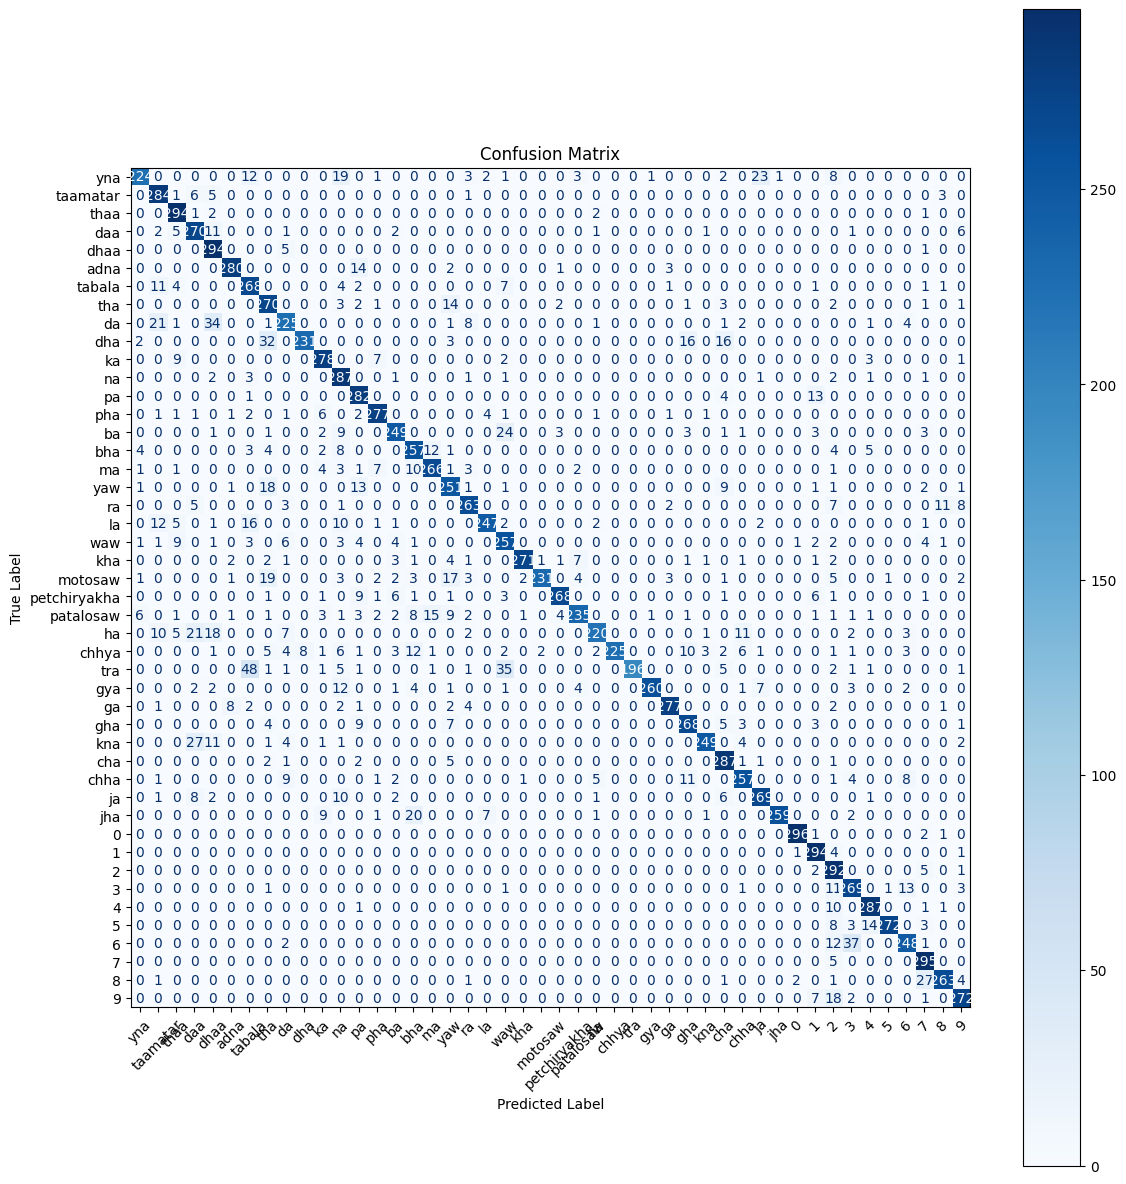

In [21]:
plot_confusion_matrix(vanilla_cnn_model, test_dataset, class_names)

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━

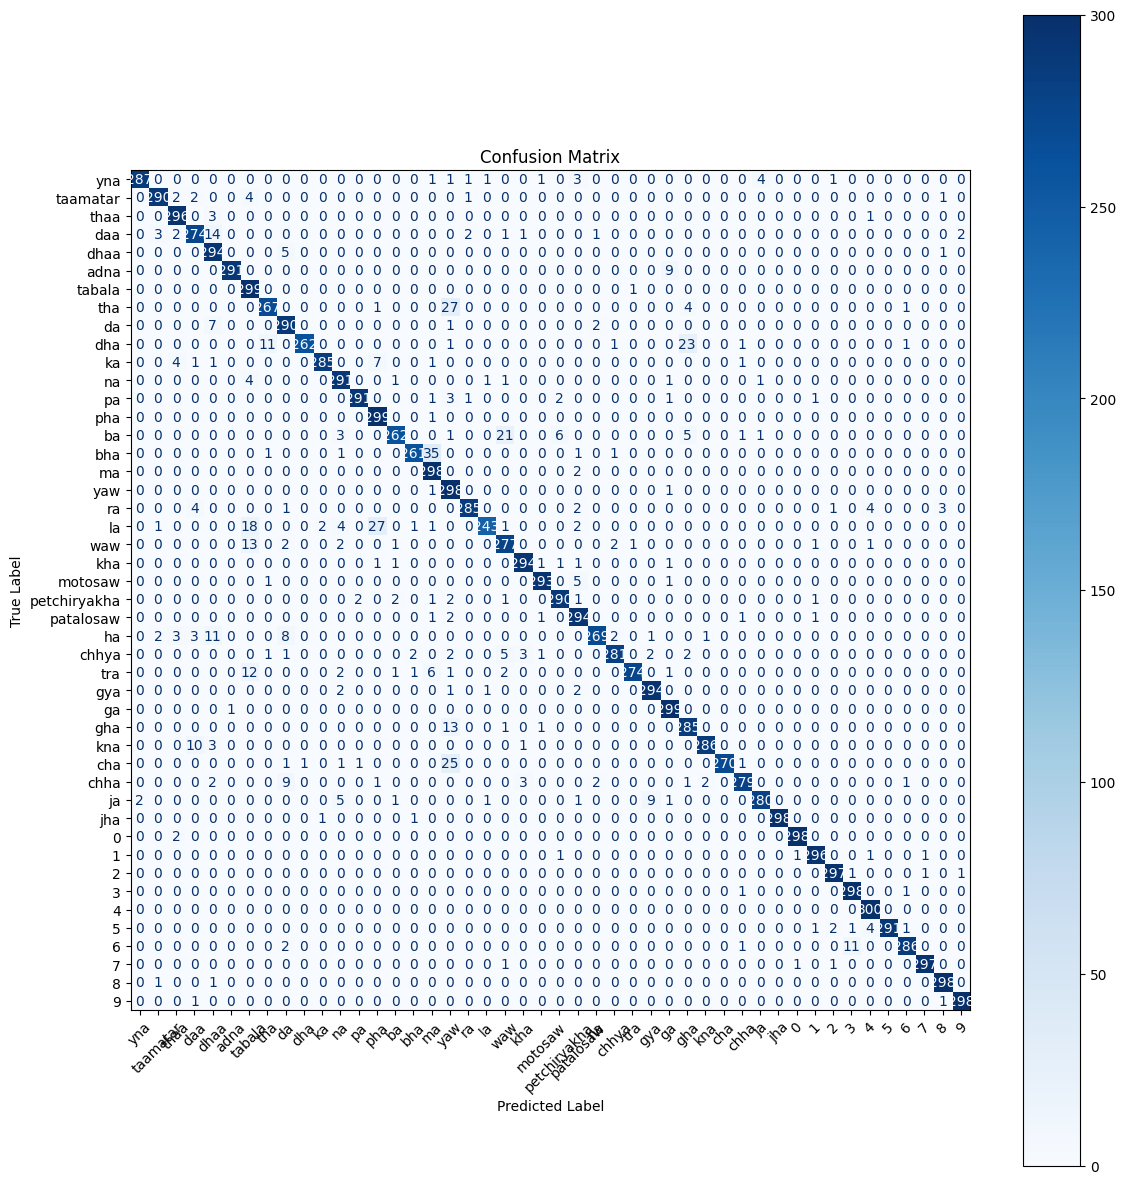

In [32]:
plot_confusion_matrix(efficientnet, test_dataset, class_names)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━

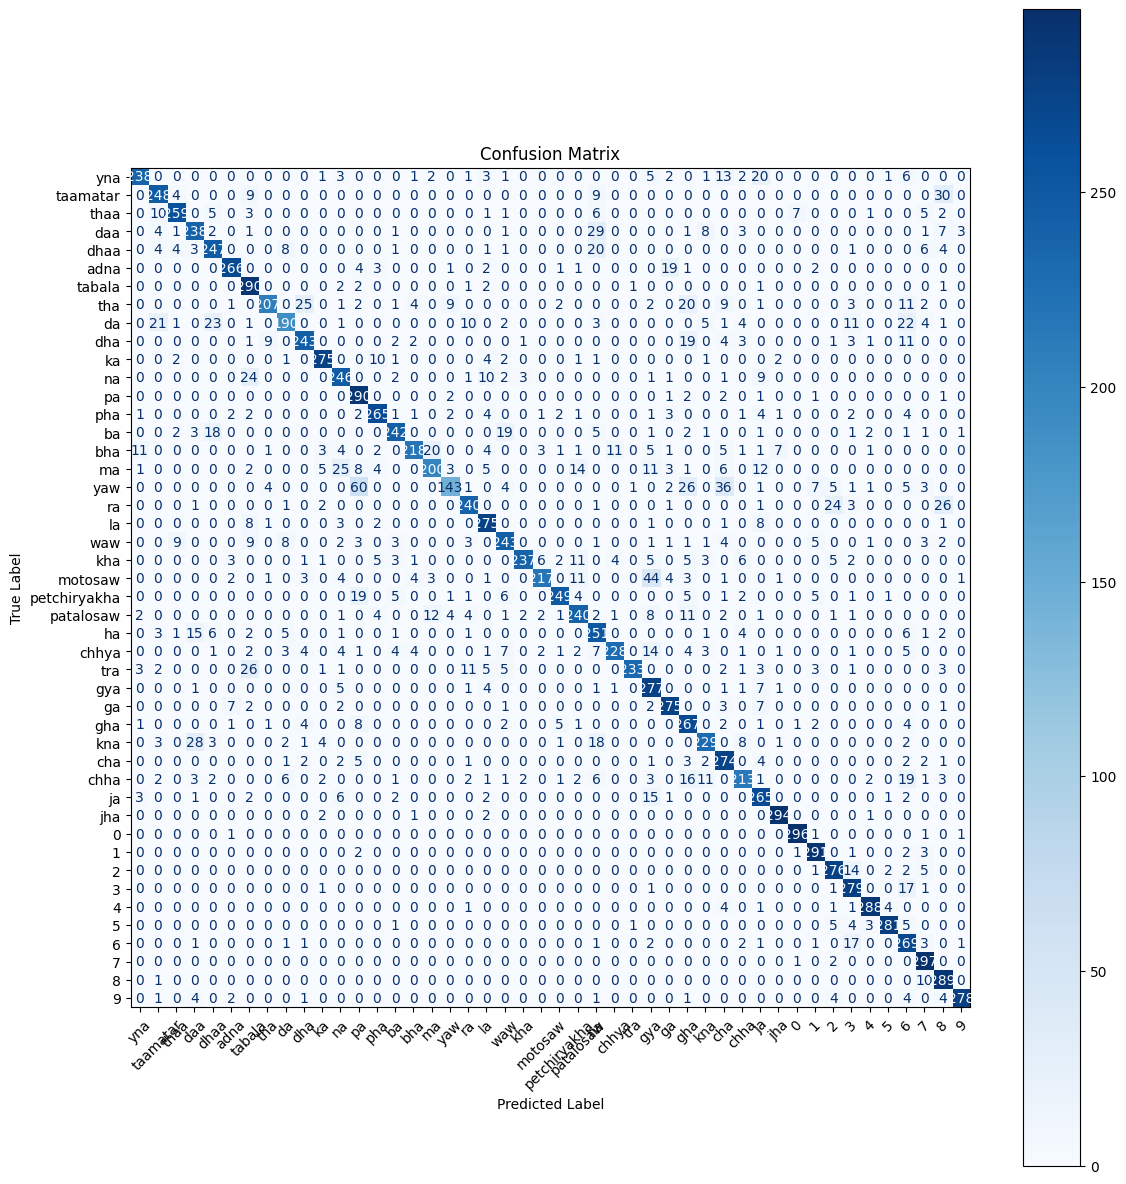

In [34]:
plot_confusion_matrix(mobilenet, test_dataset, class_names)

In [25]:
plot_confusion_matrix(dbn, test_dataset, class_names)

InvalidArgumentError: {{function_node __wrapped__BatchMatMulV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} Matrix size-incompatible: In[0]: [100,32,32,3], In[1]: [3072,2048] [Op:BatchMatMulV2] name: 